# Lab1-Assignment

Copyright: Vrije Universiteit Amsterdam, Faculty of Humanities, CLTL

This notebook describes the assignment for Lab 1 of the text mining course. 

**Points**: each exercise is prefixed with the number of points you can obtain for the exercise.

We assume you have worked through the following notebooks:
* **Lab1.1-introduction**
* **Lab1.2-introduction-to-NLTK**
* **Lab1.3-introduction-to-spaCy** 

In this assignment, you will process an English text (**Lab1-apple-samsung-example.txt**) with both NLTK and spaCy and discuss the similarities and differences.

## Credits
The notebooks in this block have been originally created by [Marten Postma](https://martenpostma.github.io). Adaptations were made by [Filip Ilievski](http://ilievski.nl).

## Tip: how to read a file from disk
Let's open the file **Lab1-apple-samsung-example.txt** from disk.

In [1]:
from pathlib import Path

In [2]:
cur_dir = Path().resolve() # this should provide you with the folder in which this notebook is placed
path_to_file = Path.joinpath(cur_dir, 'Lab1-apple-samsung-example.txt')
print(path_to_file)
print('does path exist? ->', Path.exists(path_to_file))

/home/ago/tmpVU/ba-text-mining-2023-group52/lab_sessions/lab1/Lab1-apple-samsung-example.txt
does path exist? -> True


If the output from the code cell above states that **does path exist? -> False**, please check that the file **Lab1-apple-samsung-example.txt** is in the same directory as this notebook.

In [210]:
with open(path_to_file) as infile:
    text = infile.read()

print('number of characters', len(text))

number of characters 1139


## [total points: 4] Exercise 1: NLTK
In this exercise, we use NLTK to apply **Part-of-speech (POS) tagging**, **Named Entity Recognition (NER)**, and **Constituency parsing**. The following code snippet already performs sentence splitting and tokenization. 

In [211]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize

In [212]:
sentences_nltk = sent_tokenize(text)

In [213]:
tokens_per_sentence = []
for sentence_nltk in sentences_nltk:
    sent_tokens = word_tokenize(sentence_nltk)
    tokens_per_sentence.append(sent_tokens)

We will use lists to keep track of the output of the NLP tasks. We can hence inspect the output for each task using the index of the sentence.

In [214]:
#sent_id = 0
print('SENTENCE', sentences_nltk[3])
print('TOKENS', tokens_per_sentence[sent_id])

SENTENCE In August, Samsung lost a US patent case to Apple and was ordered to pay its rival $1.05bn (£0.66bn) in damages for copying features of the iPad and iPhone in its Galaxy range of devices.
TOKENS ['https', ':', '//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'Documents', 'filed', 'to', 'the', 'San', 'Jose', 'federal', 'court', 'in', 'California', 'on', 'November', '23', 'list', 'six', 'Samsung', 'products', 'running', 'the', '``', 'Jelly', 'Bean', "''", 'and', '``', 'Ice', 'Cream', 'Sandwich', "''", 'operating', 'systems', ',', 'which', 'Apple', 'claims', 'infringe', 'its', 'patents', '.']


### [point: 1] Exercise 1a: Part-of-speech (POS) tagging
Use `nltk.pos_tag` to perform part-of-speech tagging on each sentence.

Use `print` to **show** the output in the notebook (and hence also in the exported PDF!).

In [215]:
pos_tags_per_sentence = []
for tokens in tokens_per_sentence:
    pos_tokens = nltk.pos_tag(tokens)
    print(pos_tokens)
    print()
    pos_tags_per_sentence.append(pos_tokens)

[('https', 'NN'), (':', ':'), ('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ'), ('Documents', 'NNS'), ('filed', 'VBN'), ('to', 'TO'), ('the', 'DT'), ('San', 'NNP'), ('Jose', 'NNP'), ('federal', 'JJ'), ('court', 'NN'), ('in', 'IN'), ('California', 'NNP'), ('on', 'IN'), ('November', 'NNP'), ('23', 'CD'), ('list', 'NN'), ('six', 'CD'), ('Samsung', 'NNP'), ('products', 'NNS'), ('running', 'VBG'), ('the', 'DT'), ('``', '``'), ('Jelly', 'RB'), ('Bean', 'NNP'), ("''", "''"), ('and', 'CC'), ('``', '``'), ('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP'), ("''", "''"), ('operating', 'VBG'), ('systems', 'NNS'), (',', ','), ('which', 'WDT'), ('Apple', 'NNP'), ('claims', 'VBZ'), ('infringe', 'VB'), ('its', 'PRP$'), ('patents', 'NNS'), ('.', '.')]

[('The', 'DT'), ('six', 'CD'), ('phones', 'NNS'), ('and', 'CC'), ('tablets', 'NNS'), ('affected', 'VBN'), ('are', 'VBP'), ('the', 'DT'), ('Galaxy', 'NNP'), ('S', 'NNP'), ('III', 'NNP

In [216]:
print(pos_tags_per_sentence)

[[('https', 'NN'), (':', ':'), ('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ'), ('Documents', 'NNS'), ('filed', 'VBN'), ('to', 'TO'), ('the', 'DT'), ('San', 'NNP'), ('Jose', 'NNP'), ('federal', 'JJ'), ('court', 'NN'), ('in', 'IN'), ('California', 'NNP'), ('on', 'IN'), ('November', 'NNP'), ('23', 'CD'), ('list', 'NN'), ('six', 'CD'), ('Samsung', 'NNP'), ('products', 'NNS'), ('running', 'VBG'), ('the', 'DT'), ('``', '``'), ('Jelly', 'RB'), ('Bean', 'NNP'), ("''", "''"), ('and', 'CC'), ('``', '``'), ('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP'), ("''", "''"), ('operating', 'VBG'), ('systems', 'NNS'), (',', ','), ('which', 'WDT'), ('Apple', 'NNP'), ('claims', 'VBZ'), ('infringe', 'VB'), ('its', 'PRP$'), ('patents', 'NNS'), ('.', '.')], [('The', 'DT'), ('six', 'CD'), ('phones', 'NNS'), ('and', 'CC'), ('tablets', 'NNS'), ('affected', 'VBN'), ('are', 'VBP'), ('the', 'DT'), ('Galaxy', 'NNP'), ('S', 'NNP'), ('III', 'NN

### [point: 1] Exercise 1b: Named Entity Recognition (NER)
Use `nltk.chunk.ne_chunk` to perform Named Entity Recognition (NER) on each sentence.

Use `print` to **show** the output in the notebook (and hence also in the exported PDF!).

In [217]:
ner_tags_per_sentence = []

for token in pos_tags_per_sentence:
    chunked_token_nltk = nltk.chunk.ne_chunk(token)
    print(chunked_token_nltk)
    ner_tags_per_sentence.append(chunked_token_nltk)

(S
  https/NN
  :/:
  //www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html/JJ
  Documents/NNS
  filed/VBN
  to/TO
  the/DT
  (ORGANIZATION San/NNP Jose/NNP)
  federal/JJ
  court/NN
  in/IN
  (GPE California/NNP)
  on/IN
  November/NNP
  23/CD
  list/NN
  six/CD
  (ORGANIZATION Samsung/NNP)
  products/NNS
  running/VBG
  the/DT
  ``/``
  Jelly/RB
  (GPE Bean/NNP)
  ''/''
  and/CC
  ``/``
  Ice/NNP
  Cream/NNP
  Sandwich/NNP
  ''/''
  operating/VBG
  systems/NNS
  ,/,
  which/WDT
  (PERSON Apple/NNP)
  claims/VBZ
  infringe/VB
  its/PRP$
  patents/NNS
  ./.)
(S
  The/DT
  six/CD
  phones/NNS
  and/CC
  tablets/NNS
  affected/VBN
  are/VBP
  the/DT
  (ORGANIZATION Galaxy/NNP)
  S/NNP
  III/NNP
  ,/,
  running/VBG
  the/DT
  new/JJ
  (PERSON Jelly/NNP Bean/NNP)
  system/NN
  ,/,
  the/DT
  (ORGANIZATION Galaxy/NNP)
  Tab/NNP
  8.9/CD
  Wifi/NNP
  tablet/NN
  ,/,
  the/DT
  (ORGANIZATION Galaxy/NNP)
  Tab/NNP
  2/CD
  10.1/CD
  ,/,
  (PE

In [218]:
print(ner_tags_per_sentence)

[Tree('S', [('https', 'NN'), (':', ':'), ('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ'), ('Documents', 'NNS'), ('filed', 'VBN'), ('to', 'TO'), ('the', 'DT'), Tree('ORGANIZATION', [('San', 'NNP'), ('Jose', 'NNP')]), ('federal', 'JJ'), ('court', 'NN'), ('in', 'IN'), Tree('GPE', [('California', 'NNP')]), ('on', 'IN'), ('November', 'NNP'), ('23', 'CD'), ('list', 'NN'), ('six', 'CD'), Tree('ORGANIZATION', [('Samsung', 'NNP')]), ('products', 'NNS'), ('running', 'VBG'), ('the', 'DT'), ('``', '``'), ('Jelly', 'RB'), Tree('GPE', [('Bean', 'NNP')]), ("''", "''"), ('and', 'CC'), ('``', '``'), ('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP'), ("''", "''"), ('operating', 'VBG'), ('systems', 'NNS'), (',', ','), ('which', 'WDT'), Tree('PERSON', [('Apple', 'NNP')]), ('claims', 'VBZ'), ('infringe', 'VB'), ('its', 'PRP$'), ('patents', 'NNS'), ('.', '.')]), Tree('S', [('The', 'DT'), ('six', 'CD'), ('phones', 'NNS'), ('and', 'CC'),

### [points: 2] Exercise 1c: Constituency parsing
Use the `nltk.RegexpParser` to perform constituency parsing on each sentence.

Use `print` to **show** the output in the notebook (and hence also in the exported PDF!).

In [219]:
constituent_parser = nltk.RegexpParser('''
NP: {<DT>? <JJ>* <NN>*} # NP
P: {<IN>}           # Preposition
V: {<V.*>}          # Verb
PP: {<P> <NP>}      # PP -> P NP
VP: {<V> <NP|PP>*}  # VP -> V (NP|PP)*''')

In [220]:
constituency_output_per_sentence = []
for sentence in ner_tags_per_sentence:
    parsed_sentence = constituent_parser.parse(sentence)
    print(parsed_sentence)
    constituency_output_per_sentence.append(parsed_sentence)

(S
  (NP https/NN)
  :/:
  (NP
    //www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html/JJ)
  Documents/NNS
  (VP (V filed/VBN))
  to/TO
  (NP the/DT)
  (ORGANIZATION San/NNP Jose/NNP)
  (NP federal/JJ court/NN)
  (P in/IN)
  (GPE California/NNP)
  (P on/IN)
  November/NNP
  23/CD
  (NP list/NN)
  six/CD
  (ORGANIZATION Samsung/NNP)
  products/NNS
  (VP (V running/VBG) (NP the/DT))
  ``/``
  Jelly/RB
  (GPE Bean/NNP)
  ''/''
  and/CC
  ``/``
  Ice/NNP
  Cream/NNP
  Sandwich/NNP
  ''/''
  (VP (V operating/VBG))
  systems/NNS
  ,/,
  which/WDT
  (PERSON Apple/NNP)
  (VP (V claims/VBZ))
  (VP (V infringe/VB))
  its/PRP$
  patents/NNS
  ./.)
(S
  (NP The/DT)
  six/CD
  phones/NNS
  and/CC
  tablets/NNS
  (VP (V affected/VBN))
  (VP (V are/VBP) (NP the/DT))
  (ORGANIZATION Galaxy/NNP)
  S/NNP
  III/NNP
  ,/,
  (VP (V running/VBG) (NP the/DT new/JJ))
  (PERSON Jelly/NNP Bean/NNP)
  (NP system/NN)
  ,/,
  (NP the/DT)
  (ORGANIZATION Galaxy

In [221]:
print(constituency_output_per_sentence)

[Tree('S', [Tree('NP', [('https', 'NN')]), (':', ':'), Tree('NP', [('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ')]), ('Documents', 'NNS'), Tree('VP', [Tree('V', [('filed', 'VBN')])]), ('to', 'TO'), Tree('NP', [('the', 'DT')]), Tree('ORGANIZATION', [('San', 'NNP'), ('Jose', 'NNP')]), Tree('NP', [('federal', 'JJ'), ('court', 'NN')]), Tree('P', [('in', 'IN')]), Tree('GPE', [('California', 'NNP')]), Tree('P', [('on', 'IN')]), ('November', 'NNP'), ('23', 'CD'), Tree('NP', [('list', 'NN')]), ('six', 'CD'), Tree('ORGANIZATION', [('Samsung', 'NNP')]), ('products', 'NNS'), Tree('VP', [Tree('V', [('running', 'VBG')]), Tree('NP', [('the', 'DT')])]), ('``', '``'), ('Jelly', 'RB'), Tree('GPE', [('Bean', 'NNP')]), ("''", "''"), ('and', 'CC'), ('``', '``'), ('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP'), ("''", "''"), Tree('VP', [Tree('V', [('operating', 'VBG')])]), ('systems', 'NNS'), (',', ','), ('which', 'WDT'), Tree('PER

Augment the RegexpParser so that it also detects Named Entity Phrases (NEP), e.g., that it detects *Galaxy S III* and *Ice Cream Sandwich*

In [222]:
constituent_parser_v2 = nltk.RegexpParser('''
NP: {<DT>? <JJ>* <NN>*} # NP
P: {<IN>}           # Preposition
V: {<V.*>}          # Verb
PP: {<P> <NP>}      # PP -> P NP
VP: {<V> <NP|PP>*}  # VP -> V (NP|PP)*
NEP: {<NNP> <NNP> <NNP>}             # NEP''')

In [223]:
constituency_v2_output_per_sentence = []
for sentence in ner_tags_per_sentence:
    parsed_sentence = constituent_parser_v2.parse(sentence)
    print(parsed_sentence)
    constituency_v2_output_per_sentence.append(parsed_sentence)

(S
  (NP https/NN)
  :/:
  (NP
    //www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html/JJ)
  Documents/NNS
  (VP (V filed/VBN))
  to/TO
  (NP the/DT)
  (ORGANIZATION San/NNP Jose/NNP)
  (NP federal/JJ court/NN)
  (P in/IN)
  (GPE California/NNP)
  (P on/IN)
  November/NNP
  23/CD
  (NP list/NN)
  six/CD
  (ORGANIZATION Samsung/NNP)
  products/NNS
  (VP (V running/VBG) (NP the/DT))
  ``/``
  Jelly/RB
  (GPE Bean/NNP)
  ''/''
  and/CC
  ``/``
  (NEP Ice/NNP Cream/NNP Sandwich/NNP)
  ''/''
  (VP (V operating/VBG))
  systems/NNS
  ,/,
  which/WDT
  (PERSON Apple/NNP)
  (VP (V claims/VBZ))
  (VP (V infringe/VB))
  its/PRP$
  patents/NNS
  ./.)
(S
  (NP The/DT)
  six/CD
  phones/NNS
  and/CC
  tablets/NNS
  (VP (V affected/VBN))
  (VP (V are/VBP) (NP the/DT))
  (ORGANIZATION Galaxy/NNP)
  S/NNP
  III/NNP
  ,/,
  (VP (V running/VBG) (NP the/DT new/JJ))
  (PERSON Jelly/NNP Bean/NNP)
  (NP system/NN)
  ,/,
  (NP the/DT)
  (ORGANIZATION Gala

In [224]:
print(constituency_v2_output_per_sentence)

[Tree('S', [Tree('NP', [('https', 'NN')]), (':', ':'), Tree('NP', [('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ')]), ('Documents', 'NNS'), Tree('VP', [Tree('V', [('filed', 'VBN')])]), ('to', 'TO'), Tree('NP', [('the', 'DT')]), Tree('ORGANIZATION', [('San', 'NNP'), ('Jose', 'NNP')]), Tree('NP', [('federal', 'JJ'), ('court', 'NN')]), Tree('P', [('in', 'IN')]), Tree('GPE', [('California', 'NNP')]), Tree('P', [('on', 'IN')]), ('November', 'NNP'), ('23', 'CD'), Tree('NP', [('list', 'NN')]), ('six', 'CD'), Tree('ORGANIZATION', [('Samsung', 'NNP')]), ('products', 'NNS'), Tree('VP', [Tree('V', [('running', 'VBG')]), Tree('NP', [('the', 'DT')])]), ('``', '``'), ('Jelly', 'RB'), Tree('GPE', [('Bean', 'NNP')]), ("''", "''"), ('and', 'CC'), ('``', '``'), Tree('NEP', [('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP')]), ("''", "''"), Tree('VP', [Tree('V', [('operating', 'VBG')])]), ('systems', 'NNS'), (',', ','), ('which', 'W

## [total points: 1] Exercise 2: spaCy
Use Spacy to process the same text as you analyzed with NLTK.

In [225]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

In [226]:
doc = nlp(text) 
sents = list(doc.sents)
print("Part Of Speech tagging:")
for token in doc:
    print(token.text, token.pos_)



Part Of Speech tagging:
https://www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html NOUN


 SPACE
Documents NOUN
filed VERB
to ADP
the DET
San PROPN
Jose PROPN
federal ADJ
court NOUN
in ADP
California PROPN
on ADP
November PROPN
23 NUM
list NOUN
six NUM
Samsung PROPN
products NOUN
running VERB
the DET
" PUNCT
Jelly PROPN
Bean PROPN
" PUNCT
and CCONJ
" PUNCT
Ice PROPN
Cream PROPN
Sandwich NOUN
" PUNCT
operating NOUN
systems NOUN
, PUNCT
which PRON
Apple PROPN
claims VERB
infringe VERB
its PRON
patents NOUN
. PUNCT

 SPACE
The DET
six NUM
phones NOUN
and CCONJ
tablets NOUN
affected VERB
are AUX
the DET
Galaxy PROPN
S PROPN
III PROPN
, PUNCT
running VERB
the DET
new ADJ
Jelly PROPN
Bean PROPN
system NOUN
, PUNCT
the DET
Galaxy PROPN
Tab PROPN
8.9 NUM
Wifi PROPN
tablet NOUN
, PUNCT
the DET
Galaxy PROPN
Tab PROPN
2 NUM
10.1 NUM
, PUNCT
Galaxy PROPN
Rugby PROPN
Pro PROPN
and CCONJ
Galaxy PROPN
S PROPN
III PROPN
mini NOUN
. PUNCT

 SPACE
Ap

In [227]:
print("Named Entity Recognition")
for ent in doc.ents:
    print(ent.text, ent.label_)

Named Entity Recognition
https://www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html TIME
San Jose GPE
California GPE
November 23 DATE
six CARDINAL
Samsung ORG
the "Jelly Bean LAW
Apple ORG
six CARDINAL
the Galaxy S III ORG
Jelly Bean ORG
8.9 CARDINAL
2 10.1 DATE
Galaxy Rugby Pro ORG
Galaxy S III PERSON
Apple ORG
Apple ORG
August DATE
Samsung ORG
US GPE
Apple ORG
1.05bn MONEY
0.66bn MONEY
iPad ORG
Galaxy FAC
Samsung ORG
UK GPE
Samsung ORG
Apple ORG
South Korean NORP
iPad ORG


In [228]:
displacy.render(sents[3:6], jupyter=True, style='ent')

Constituency Parsing:

In [229]:
displacy.render(sents[2], jupyter=True, style='dep')

small tip: You can use **sents = list(doc.sents)** to be able to use the index to access a sentence like **sents[2]** for the third sentence.


## [total points: 7] Exercise 3: Comparison NLTK and spaCy
We will now compare the output of NLTK and spaCy, i.e., in what do they differ?

### [points: 3] Exercise 3a: Part of speech tagging
Compare the output from NLTK and spaCy regarding part of speech tagging.

* To compare, you probably would like to compare sentence per sentence. Describe if the sentence splitting is different for NLTK than for spaCy. If not, where do they differ?
In this particular case sentence splitting was done identically by the to libraries
* After checking the sentence splitting, select a sentence for which you expect interesting results and perhaps differences. Motivate your choice.
On sentence #3 I expected differences in the named entity attribution. Indeed I found some differences. Namely spaCy is more consistent and offers more information while nltk makes several mistakes more (August is a geo-political-entity, msung and Apple are not the same type of entity and Ipad is an organisation)
* Compare the output in `token.tag` from spaCy to the part of speech tagging from NLTK for each token in your selected sentence. Are there any differences? This is not a trick question; it is possible that there are no differences.
I could not find many differences in the sentence I have selected.
A difference was present only in one occurrence NLTK identified the word "Rival" as adjective while spaCy as Noun (It was a noun)

In [230]:

for i in range(3):
    print(f"\nSentence {i}: \n\t NLTK: \n\t\t{sentences_nltk[i]} \n\tspaCy: \n\t\t{sents[i]}")


Sentence 0: 
	 NLTK: 
		https://www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html

Documents filed to the San Jose federal court in California on November 23 list six Samsung products running the "Jelly Bean" and "Ice Cream Sandwich" operating systems, which Apple claims infringe its patents. 
	spaCy: 
		https://www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html

Documents filed to the San Jose federal court in California on November 23 list six Samsung products running the "Jelly Bean" and "Ice Cream Sandwich" operating systems, which Apple claims infringe its patents.


Sentence 1: 
	 NLTK: 
		The six phones and tablets affected are the Galaxy S III, running the new Jelly Bean system, the Galaxy Tab 8.9 Wifi tablet, the Galaxy Tab 2 10.1, Galaxy Rugby Pro and Galaxy S III mini. 
	spaCy: 
		The six phones and tablets affected are the Galaxy S III, running the new Jelly Bean sy

In [231]:
i = 3
print("NLTK:")
pos_tokens = nltk.pos_tag(tokens_per_sentence[i])
named_entities_nltk = nltk.chunk.ne_chunk(pos_tokens)
print(named_entities_nltk)
print("spaCy:")
displacy.render(sents[i], jupyter=True, style='ent')

NLTK:
(S
  In/IN
  (GPE August/NNP)
  ,/,
  (PERSON Samsung/NNP)
  lost/VBD
  a/DT
  (GSP US/NNP)
  patent/NN
  case/NN
  to/TO
  (GPE Apple/NNP)
  and/CC
  was/VBD
  ordered/VBN
  to/TO
  pay/VB
  its/PRP$
  rival/JJ
  $/$
  1.05bn/CD
  (/(
  £0.66bn/NN
  )/)
  in/IN
  damages/NNS
  for/IN
  copying/VBG
  features/NNS
  of/IN
  the/DT
  (ORGANIZATION iPad/NN)
  and/CC
  (ORGANIZATION iPhone/NN)
  in/IN
  its/PRP$
  (GPE Galaxy/NNP)
  range/NN
  of/IN
  devices/NNS
  ./.)
spaCy:


In [232]:
sentence = 3

pos_tokens = nltk.pos_tag(tokens_per_sentence[sentence])
named_entities_nltk = nltk.chunk.ne_chunk(pos_tokens)
#print(named_entities_nltk)

named_entities_spaCy = []
for token in sents[sentence]:
    named_entities_spaCy.append((token, token.tag_))

for i in range(len(named_entities_nltk)):
    print("NLTK: ", named_entities_nltk[i], "\t\t\tspaCy:(", named_entities_spaCy[i][0], ", ", named_entities_spaCy[i][1], ")")

NLTK:  ('In', 'IN') 			spaCy:( " ,  '' )
NLTK:  (GPE August/NNP) 			spaCy:( 
 ,  _SP )
NLTK:  (',', ',') 			spaCy:( In ,  IN )
NLTK:  (PERSON Samsung/NNP) 			spaCy:( August ,  NNP )
NLTK:  ('lost', 'VBD') 			spaCy:( , ,  , )
NLTK:  ('a', 'DT') 			spaCy:( Samsung ,  NNP )
NLTK:  (GSP US/NNP) 			spaCy:( lost ,  VBD )
NLTK:  ('patent', 'NN') 			spaCy:( a ,  DT )
NLTK:  ('case', 'NN') 			spaCy:( US ,  NNP )
NLTK:  ('to', 'TO') 			spaCy:( patent ,  NN )
NLTK:  (GPE Apple/NNP) 			spaCy:( case ,  NN )
NLTK:  ('and', 'CC') 			spaCy:( to ,  IN )
NLTK:  ('was', 'VBD') 			spaCy:( Apple ,  NNP )
NLTK:  ('ordered', 'VBN') 			spaCy:( and ,  CC )
NLTK:  ('to', 'TO') 			spaCy:( was ,  VBD )
NLTK:  ('pay', 'VB') 			spaCy:( ordered ,  VBN )
NLTK:  ('its', 'PRP$') 			spaCy:( to ,  TO )
NLTK:  ('rival', 'JJ') 			spaCy:( pay ,  VB )
NLTK:  ('$', '$') 			spaCy:( its ,  PRP$ )
NLTK:  ('1.05bn', 'CD') 			spaCy:( rival ,  NN )
NLTK:  ('(', '(') 			spaCy:( $ ,  $ )
NLTK:  ('£0.66bn', 'NN') 			spaCy:( 1.05bn ,  

### [points: 2] Exercise 3b: Named Entity Recognition (NER)
* Describe differences between the output from NLTK and spaCy for Named Entity Recognition. Which one do you think performs better?
I do not know if spaCy simply supports a larger variety of entity types or if it is just better at matching. SpaCy generally gives more information or more accurate information especially when it comes to nouns.

### [points: 2] Exercise 3c: Constituency/dependency parsing
Choose one sentence from the text and run constituency parsing using NLTK and dependency parsing using spaCy.
* describe briefly the difference between constituency parsing and dependency parsing
In constituency parsing the position of words in the sentence is ignored and only the structural role of words is considered while in dependency parsing the relationship between words is the focus (context is important)
* describe differences between the output from NLTK and spaCy.
NLTK builds a tree and only describes what each word is. spaCy does that but also describes relations within the words in the sentence.

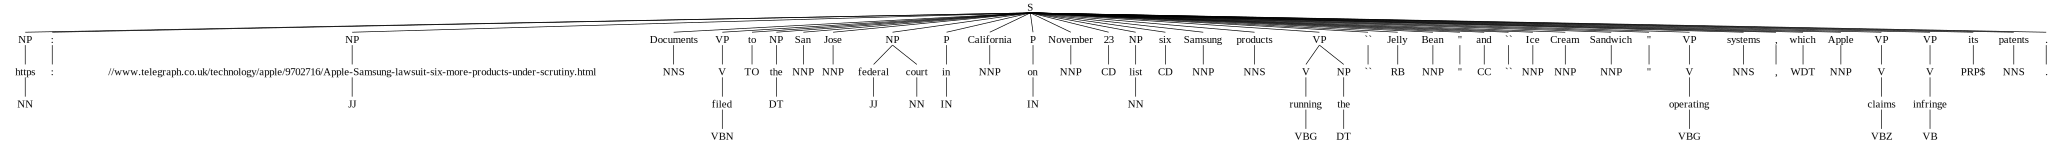

In [233]:
sentence_id = 0
constituent_parser = nltk.RegexpParser('''
NP: {<DT>? <JJ>* <NN>*} # NP
P: {<IN>}           # Preposition
V: {<V.*>}          # Verb
PP: {<P> <NP>}      # PP -> P NP
VP: {<V> <NP|PP>*}  # VP -> V (NP|PP)*''')

pos_tokens = nltk.pos_tag(tokens_per_sentence[sentence_id])
constituent_parser.parse(pos_tokens)


In [234]:
displacy.render(sents[sentence_id], jupyter=True, style='dep')

In [235]:
displacy.render(sents[sentence_id], jupyter=True, style='dep')

# End of this notebook